In [107]:
##Import different libraries and initialize the different files

import json
import pandas as pd
import matplotlib.pyplot as plt
import pylab


with open('teams.json') as json_data:
    data_dict1 = json.load(json_data,encoding = "ISO-8859-1")
df1 = pd.DataFrame.from_dict(data_dict1, orient='columns')
df1 = df1.rename(columns={'wyId': 'winner'})
with open('matches_England.json') as json_data:
    data_dict = json.load(json_data)
df = pd.DataFrame.from_dict(data_dict, orient='columns')

# Question 1 Who wants to be a Champion?
    
    

In [108]:
# First we start by making the 'Matches' dataframe clearer. 
# We split the column 'label' and we create differents columns with : the name of the team that won, the name o the team that lost, a column with 'yes' if the result was Draw, the name of the team that play home and the name of the team that play away. 
# we finally concatenate all these columns together, with the initial 'Matches' dataframe

df2 = df.label 
liste= []
for row in df2:
    a = row.replace('-',',')
    a = a.split(',')
    liste.append(a)
gagnant = []
perdant = []
draw = []
equipeA= []
equipeB= []
for k in liste:
    equipeA.append(k[0].strip())
    equipeB.append(k[1].strip())
    a = int(k[2])
    b = int(k[3])
    if a > b :
        gagnant.append(k[0].strip())
        perdant.append(k[1].strip())
        draw.append("NON")
    elif a < b :
        gagnant.append(k[1].strip())
        perdant.append(k[0].strip())
        draw.append("NON")
    else : 
        gagnant.append("NON")
        perdant.append("NON")
        draw.append("YES")
        
dfgagnant = pd.DataFrame(gagnant, columns = ['gagnant'])
dfperdant = pd.DataFrame(perdant, columns = ['perdant'])
dfeA = pd.DataFrame(equipeA, columns = ['EquipeA'])
dfeB = pd.DataFrame(equipeB, columns = ['EquipeB'])
dfnul = pd.DataFrame(draw, columns = ['Draw'])
dfResult = pd.concat([df,dfgagnant, dfperdant, dfnul,dfeA,dfeB], axis = 1)


In [109]:
dfResult =dfResult.drop(columns= ['date','competitionId', 'referees', 'roundId', 'seasonId', 'teamsData','venue', 'winner', 'wyId']) 

In [110]:
# Here we work with the 'teams' file. We look for the country of each team and we write it in a new column that we concatenate with the initial dataframe. 
# Then we select only the teams that have "England" or "Wales" in the "country" new column.

with open('teams.json') as json_data:
    team = json.load(json_data)
dfteam = pd.DataFrame(team)
country = []
import numpy as np
for row in dfteam.area:
    for clef,values in row.items():
        if clef == "name":
            country.append(values)
dfcountry = pd.DataFrame(country, columns = ["country"])
dfteam = pd.concat([dfteam, dfcountry], axis=1 )
dfenglishteam = dfteam.loc[(dfteam['country'] == 'England') | (dfteam['country'] == 'Wales') ]

In [111]:

# here is a function that find the number of sucessive occurence of 'nbtofind' in a list 'lst'
def findOcc(lst, nbtofind):

    
    maxi = 0
    for k in range(len(lst)) : 
        i = 1
        if lst[k] == nbtofind:
      
            while (k+i < len(lst)) and (lst[k+i] == nbtofind):
                    i = i+1
                
            if i > maxi:
                maxi = i
    return(maxi)



In [112]:
# we  iterrate over the english team. for each team we create a list with the points after each game week, and a list with the sum of points after each game week

ranking = []
for name in dfenglishteam.head(20).name:
    df = dfResult.loc[(dfResult['EquipeA'] == name) | (dfResult['EquipeB'] == name)] # Here we find all the game of the team 'name'
    df = df.sort_values(by = 'gameweek') 
    point = []
    point2 = []
    i = 0
    for index,row in df.iterrows():
        if row['Draw'] == "NON":
            if (row['gagnant'] == name):
                if i == 0:
                    point.append(3)
                    point2.append(3)
                elif i !=0:
                    point.append(3+point[i-1])
                    point2.append(3)
                i = i+1
            elif (row['perdant'] == name):  
                if i == 0:
                    point.append(0)
                    point2.append(0)
                elif i !=0:
                    point.append(0+point[i-1])
                    point2.append(0)
                i = i+1
        else:
            if i == 0:
                    point.append(1)
                    point2.append(1)
            if i !=0:
                    point.append(1+point[i-1])
                    point2.append(1)
            i = i+1
    ranking.append((name, point[-1],findOcc(point2,3),findOcc(point2,0) )) # we fill this list that contain tuples with: the name of the team, its final point number, number of sucessive wins, number of sucessive loses games

In [113]:
# we create different ranking list. ranking1 ranks by number of points, ranking2 ranks by number of sucessive won games and ranking3 ranks by number of sucessive lost games

ranking1 = sorted(ranking, key=lambda tup: tup[1], reverse = True)
ranking2 = sorted(ranking, key=lambda tup: tup[2], reverse = True)
ranking2 = ranking2[0:2]
ranking4 = sorted(ranking, key=lambda tup: tup[3], reverse = True)[0:2]
ranking3 = []
ranking5 = []
for x in ranking2: 
    ranking3.append(x[0])
for x in ranking4: 
    ranking5.append(x[0])


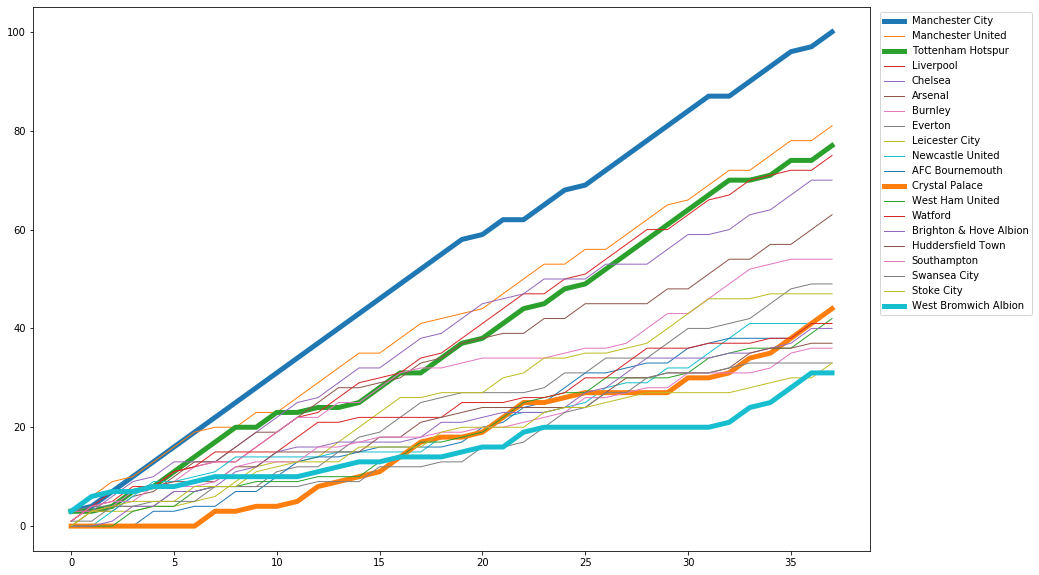

In [114]:
# for each team in the ranking list, we calculte the running sum of points and we plot it.
import pylab

for row in ranking1:
    name = row[0]
    df = dfResult.loc[(dfResult['EquipeA'] == name) | (dfResult['EquipeB'] == name)]
    df = df.sort_values(by = 'gameweek')
    point = []
    i = 0
    for index,row in df.iterrows():
        if row['Draw'] == "NON":
            if (row['gagnant'] == name):
                if i == 0:
                    point.append(3)
                    
                elif i !=0:
                    point.append(3+point[i-1])
                    
                i = i+1
            elif (row['perdant'] == name):  
                if i == 0:
                    point.append(0)
                    
                elif i !=0:
                    point.append(0+point[i-1])
                    
                i = i+1
        else:
            if i == 0:
                    point.append(1)
                    
            if i !=0:
                    point.append(1+point[i-1])
                    
            i = i+1
    fig = plt.figure(1, figsize=(15, 10)) 
    if name in ranking3: # for teams that are top2 in the ranking list of successive won, we plot it differently that others
        pylab.plot(point, linewidth = 5,label = name)
    elif name in ranking5: # for teams that are top2 in the ranking list of successive lost, we plot it differently that others

        pylab.plot(point, linewidth = 5,label = name)
    else:
        pylab.plot(point, linewidth = 1,label = name)
        
    pylab.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
     
        

# Question 2 : Chi Square test 

In [115]:
listeEquipe= ['Arsenal', "Everton", "Manchester United", "Chelsea", "Liverpool"]

In [116]:
# we iterrate over the list above
from scipy import stats
listechi = []
for equipe in listeEquipe:
    df = dfResult.loc[(dfResult['EquipeA'] == equipe ) | (dfResult['EquipeB'] == equipe)] # we find all the games of the team
    Resultat = [] # we create a list that we will  fill with the result of the team
    side = [] # we create a list that we will fill with the side of each game, relative to the team 
    for index,row in df.iterrows():
        if row.Draw == 'NON':
            if row.gagnant == equipe:
                Resultat.append("Victory")
            else:
                Resultat.append("Defeat")
        else: 
            Resultat.append("Draw")
        if row.EquipeA == equipe:
            side.append("Home")
        else:
            side.append("Away")
    dfresultat = pd.DataFrame(Resultat, columns = ["Resultat"])
    dfside = pd.DataFrame(side, columns = ["side"])
    dfquest2 = pd.concat([dfresultat, dfside], axis = 1)
    tab = pd.crosstab(dfquest2['side'],dfquest2['Resultat']) # we create the contingency table
    print(equipe)
    print(tab)
    print(" ")
    f_obs = np.array([tab.iloc[0][0:3].values,
                  tab.iloc[1][0:3].values]) # we prepare the chi square test
    


    listechi.append(stats.chi2_contingency(f_obs)[0:3]) #we do the chi square test

listechi
    
  

Arsenal
Resultat  Defeat  Draw  Victory
side                           
Away          11     4        4
Home           2     2       15
 
Everton
Resultat  Defeat  Draw  Victory
side                           
Away          10     6        3
Home           5     4       10
 
Manchester United
Resultat  Defeat  Draw  Victory
side                           
Away           5     4       10
Home           2     2       15
 
Chelsea
Resultat  Defeat  Draw  Victory
side                           
Away           6     3       10
Home           4     4       11
 
Liverpool
Resultat  Defeat  Draw  Victory
side                           
Away           5     5        9
Home           0     7       12
 


[(13.265856950067477, 0.001316302676697684, 2),
 (5.8358974358974365, 0.05404443405265433, 2),
 (2.9523809523809526, 0.22850653346991975, 2),
 (0.5904761904761906, 0.7443543391421505, 2),
 (5.761904761904763, 0.05608132660510642, 2)]

#We can say that the correlation between the side and the result depends of the team. For example, for Arsenal, the p-value < 0.05 so we can reject the hypothesis of independance, that means that the results of Arsenal depends on the side. 
#For Chelsea, the p-value > 0.05, so we cannot reject the hypothesis of independance. Chelsea results don't depend on the side.

# Question 3 : Which teams have the youngest coaches?

In [117]:
with open('matches_England.json') as json_data:
    data_dict6 = json.load(json_data,encoding = "ISO-8859-1")    

dfgames = pd.DataFrame.from_dict(data_dict6, orient='columns')

with open('teams.json') as json_data:
    data_dict1 = json.load(json_data,encoding = "ISO-8859-1")
with open('coaches.json') as json_data:
    data_dict2 = json.load(json_data,encoding = "ISO-8859-1")    

dfteam = pd.DataFrame.from_dict(data_dict1, orient='columns')

dfcoach = pd.DataFrame.from_dict(data_dict2, orient='columns')

In [118]:
# After testing to join "teams" and 'coaches' we saw that we just found 13 coaches. SO we decided to work on the "games" file espacially with the column "teamsData"
# we iterate over this column and we fill in the list the coach id and in a paralell list  with the id of the team he coached during the game
listeidcoach = []
listeidteam = []
for index, row in dfgames.iterrows(): 
    for values in row.teamsData.values():
        for k,i in values.items():
            if k == 'coachId' :
                listeidcoach.append(i)
            elif k == 'teamId' :
                listeidteam.append(i)
            
        
        


In [119]:
# Then we convert and concat the two dataframes 
dflisteidteam = pd.DataFrame(listeidteam, columns = ['wyId'])
dflisteidcoach = pd.DataFrame(listeidcoach, columns = ['idcoach'])
dfF = pd.concat([dflisteidteam,dflisteidcoach], axis = 1)

In [120]:
# After that, we merge the above dataframe with dfTeam to have the name of the teams, then with dfcoach to have the names' coach informations
dfF = pd.merge(dfF, dfteam, on = 'wyId')
dfcoach = dfcoach.rename(columns={'wyId': 'idcoach'})
dfF = pd.merge(dfF, dfcoach, on = 'idcoach')

In [121]:
# because we have duplicated rows, we just compute this lign
dfF= dfF.drop_duplicates('idcoach')

In [122]:
dfF = dfF.drop(['wyId', 'idcoach','area', 'city', 'name', 'type', 'birthArea', 'currentTeamId', 'firstName' , 'lastName', 'middleName', 'passportArea'], axis = 1)

In [123]:
# write a function that return the age with the birth date in input
from datetime import date 
  
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
  
    return age


In [124]:
# write a program that iterrate over the coaches and calculate the age
from datetime import date 
lstAge = []

for row in dfF.birthDate:
    dat = row.split('-')
    a= int(dat[0])
    b= int(dat[1])
    c = int(dat[2])
    age = calculateAge(date(a,b,c))
    lstAge.append(age)                                         
    

In [125]:
# we concat the age with the initial dataframe
dfAge = pd.DataFrame(lstAge, columns = ['Age'])
dfquest3 = pd.concat([dfF.reset_index(), dfAge], axis=1 ) 

In [126]:
# we sort by birthdate
dfquest3 = dfquest3.sort_values(by = 'birthDate',ascending = False) 




In [127]:
# after sorting by birthday, we drop duplicate to save only the youngest coach of each team
dfquest3 = dfquest3.drop_duplicates('officialName')

In [128]:
dfquest3

,index,officialName,birthDate,shortName,Age
1,37,AFC Bournemouth,1977-11-29,E. Howe,41
12,300,Watford FC,1977-07-12,Marco Silva,42
25,598,Leicester City FC,1975-12-04,M. Appleton,43
29,657,Everton FC,1973-10-16,D. Unsworth,46
15,392,Newcastle United FC,1973-02-19,Paco,46
27,607,Tottenham Hotspur FC,1972-03-02,M. Pochettino,47
22,540,Swansea City AFC,1972-01-08,P. Clement,47
8,178,Huddersfield Town FC,1971-10-19,D. Wagner,48
20,494,Southampton FC,1971-10-05,M. Pellegrino,48
0,0,Burnley FC,1971-06-28,S. Dyche,48


In [129]:
# we keep the top 10 ranking
dfquest3.drop_duplicates('officialName').head(10)

,index,officialName,birthDate,shortName,Age
1,37,AFC Bournemouth,1977-11-29,E. Howe,41
12,300,Watford FC,1977-07-12,Marco Silva,42
25,598,Leicester City FC,1975-12-04,M. Appleton,43
29,657,Everton FC,1973-10-16,D. Unsworth,46
15,392,Newcastle United FC,1973-02-19,Paco,46
27,607,Tottenham Hotspur FC,1972-03-02,M. Pochettino,47
22,540,Swansea City AFC,1972-01-08,P. Clement,47
8,178,Huddersfield Town FC,1971-10-19,D. Wagner,48
20,494,Southampton FC,1971-10-05,M. Pellegrino,48
0,0,Burnley FC,1971-06-28,S. Dyche,48


In [130]:
dfquest3 = dfquest3.drop_duplicates('officialName').head(20)

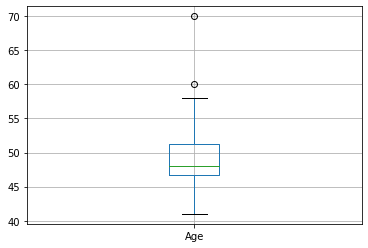

In [131]:
boxplot = dfquest3.boxplot(column=['Age'])

#The median age is around 46 years. Half of the coaches are over 46 and half are under. 

# Question 4 : Find the top 10 players with the highest ratio between completed passes and attempted passes.

In [132]:
import json
import pandas as pd
with open('events_England.json') as json_data:
    data_dict2 = json.load(json_data,encoding = "ISO-8859-1")    

dfevents = pd.DataFrame.from_dict(data_dict2, orient='columns')

with open('players.json') as json_data:
    data_dict3 = json.load(json_data,encoding = "ISO-8859-1")    

dfplayers = pd.DataFrame.from_dict(data_dict3, orient='columns')

with open('teams.json') as json_data:
    team = json.load(json_data)
dfteam = pd.DataFrame(team)
country = []
import numpy as np
for row in dfteam.area:
    for clef,values in row.items():
        if clef == "name":
            country.append(values)
dfcountry = pd.DataFrame(country, columns = ["country"])
dfteam = pd.concat([dfteam, dfcountry], axis=1 )
dfenglishteam = dfteam.loc[(dfteam['country'] == 'England') | (dfteam['country'] == 'Wales') ]


In [133]:
# We merge the dataframe events and players
dfplayers = dfplayers.rename(columns={'wyId': 'playerId'})
a = pd.merge(dfevents,dfplayers, on = 'playerId')
dfFinal = a.loc[(a['eventName'] == 'Pass' ), :]


In [134]:
# we define a list that will describe each pass by "accurate" or "not accurate"
liste = []
for row in dfFinal.tags:
    a = row[-1]
    for values in a.values():
        if int(values) == 1801:
            liste.append('Reussi')
        else: 
            liste.append('Echec')
        

In [135]:
dfPass = pd.DataFrame(liste, columns = ['Pass'])
dfFinal = dfFinal.reset_index()
dfFinal = pd.concat([dfFinal, dfPass], axis = 1)

In [136]:
dfFinal = pd.DataFrame(dfFinal)

In [137]:
tab = pd.crosstab(dfFinal['lastName'],dfFinal['Pass']) # we create the contingency table which displays each player with the accurate and not accurate pass

In [138]:
# we iterate over the tab above and for each name we calculate the pass accuracy 
listenom = []
listeAcc = []
for index,row in tab.iterrows():
    listenom.append(index)
    somme = (int(row[0]) + int(row[1]))
    if (somme > 100): # we consider the equivalent of 2 completed games 
        a = int(row[1])/somme
        listeAcc.append(round(a*100, 1))
    else: 
        listeAcc.append(0)
# after that we create dataframe from the list, we concatenate and we display the top10
dfAcc = pd.DataFrame(listeAcc, columns = ['Accuracy'])
dfname = pd.DataFrame(listenom, columns = ['lastName'])
final = pd.concat([dfAcc, dfname], axis = 1)
final.sort_values(by='Accuracy', ascending=False).head(10)

,Accuracy,lastName
431,97.6,Stones
442,94.8,Tour\u00e9
117,94.5,Delph
233,94.3,Kompany
87,94.0,Christensen
297,94.0,Mertesacker
214,93.9,Jones
345,93.8,Otamendi
134,93.6,Elsayed Elneny
332,93.6,Nilsson Lindel\u00f6f


# Question 5 :Does being a tall player mean winning more air duels?

In [139]:

dfplayers = dfplayers.rename(columns={'wyId': 'playerId'})
a = pd.merge(dfevents,dfplayers, on = 'playerId')
dfFinal = a.loc[(a['eventName'] == 'Duel' ) & (a['subEventId'] == 10 ) ,:]# as we have done previously, we select only the airduel
liste = []
for row in dfFinal.tags:
    a = row[-1]
    for values in a.values():
        if int(values) == 1801:
            liste.append('Reussi')
        else: 
            liste.append('Echec')
# for each air duel, we fill a list with "accurate" or 'not accurate'

In [140]:
dfDuel = pd.DataFrame(liste, columns = ['Duel'])
dfFinal = dfFinal.reset_index()
dfFinal = pd.concat([dfFinal, dfDuel], axis = 1)
dfFinal = dfFinal.drop([ 'passportArea', 'eventSec', 'positions'], axis=1)


In [141]:
tab = pd.crosstab(dfFinal['shortName'],dfFinal['Duel']) # as previously, we create the contingency table

In [142]:
# we iterate over tab to calculate, for each player, the accuracy
listename = []
listeAcc = []
for index,row in tab.iterrows():
    listename.append(index)
    somme = (int(row[0]) + int(row[1]))
    if (somme > 20): #we consider the equivalent of two completed games
        a = int(row[1])/somme
        listeAcc.append(round(a*100, 1))
    else: 
        listeAcc.append(0)
dfAcc = pd.DataFrame(listeAcc, columns = ['Accuracy'])
dfname = pd.DataFrame(listename, columns = ['shortName'])
final = pd.concat([dfAcc, dfname], axis = 1)




In [143]:
dfFinal = pd.merge(dfplayers,final, on = 'shortName')


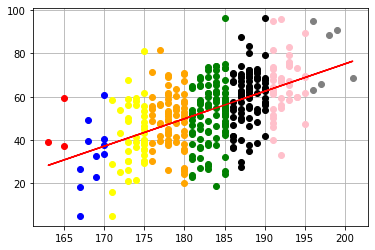

In [144]:
## We plot the linear regression associated to our study
import matplotlib.pyplot as plt
listex = []
listey=[]
for index, row in dfFinal.iterrows():
    if row.Accuracy > 0:
        listex.append(row.height)
        listey.append(row.Accuracy)
    
axes = plt.axes()
axes.grid() 



from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(listex, listey)
def predict(x):
   return slope * x + intercept
fitLine = predict(np.array(listex))
for k in range(len(listex)):
    if listex[k] <= 165 : 
        plt.plot(listex[k],listey[k],'o',color = 'red')
    elif listex[k] > 165 and listex[k] <= 170  : 
        plt.plot(listex[k],listey[k],'o',color = 'blue')
    elif listex[k] > 170 and listex[k] <= 175  : 
        plt.plot(listex[k],listey[k],'o',color = 'yellow')
    elif listex[k] > 175 and listex[k] <= 180  : 
        plt.plot(listex[k],listey[k],'o',color = 'orange')
    elif listex[k] > 180 and listex[k] <= 185  : 
        plt.plot(listex[k],listey[k],'o',color = 'green')
    elif listex[k] > 185 and listex[k] <= 190  : 
        plt.plot(listex[k],listey[k],'o',color = 'black')
    elif listex[k] > 190 and listex[k] <= 195  : 
        plt.plot(listex[k],listey[k],'o',color = 'pink')
    else : 
        plt.plot(listex[k],listey[k],'o',color = 'grey')
plt.plot(listex, fitLine, c='r')
    


# Question 6 : Free your mind! 

We try to see if winning the duels during the games has influence on the team results

In [43]:
dfenglishteam = dfenglishteam.head(20)


In [44]:
## We start by creating a list that will contain tuples which contain the name of the team + the final number of points
import pylab
ranking = []
for name in dfenglishteam.head(20).name:
    df = dfResult.loc[(dfResult['EquipeA'] == name) | (dfResult['EquipeB'] == name)]
    df = df.sort_values(by = 'gameweek')
    point = []
    i = 0
    for index,row in df.iterrows():
        if row['Draw'] == "NON":
            if (row['gagnant'] == name):
                if i == 0:
                    point.append(3)
                elif i !=0:
                    point.append(3+point[i-1])
                i = i+1
            elif (row['perdant'] == name):  
                if i == 0:
                    point.append(0)
                elif i !=0:
                    point.append(0+point[i-1])
                i = i+1
        else:
            if i == 0:
                    point.append(1)
            if i !=0:
                    point.append(1+point[i-1])
            i = i+1
    ranking.append((name, point[-1]))

In [45]:
## we create here 2 parallel lists : one with the name of the team, and one with the final number of points
name = []
point = []
for k in range(len(ranking)):
    name.append(ranking[k][0])
    point.append(ranking[k][1])

In [46]:
# we convert each list above to dataframe and we concat them
dfname = pd.DataFrame(name, columns = ['name'])
dfpoint = pd.DataFrame(point, columns = ['point'])
dfclass = pd.concat([dfname, dfpoint], axis = 1)



In [47]:
# We join the two dataframe on 'name' key to have all the usefull informations in one dataframe
dfenglishteam = pd.merge(dfenglishteam, dfclass, on = 'name')


In [48]:
# we merge the above dataframe with the 'events' and 'players' to have in one dataframe each event, with the name of the player, and the name of the team
with open('events_England.json') as json_data:
    data_dict2 = json.load(json_data,encoding = "ISO-8859-1")    

dfevents = pd.DataFrame.from_dict(data_dict2, orient='columns')

with open('players.json') as json_data:
    data_dict3 = json.load(json_data,encoding = "ISO-8859-1")    

dfplayers = pd.DataFrame.from_dict(data_dict3, orient='columns')
dfenglishteam = dfenglishteam.rename(columns={'wyId': 'currentTeamId'})
dffirst = pd.merge(dfplayers,dfenglishteam, on = 'currentTeamId')
dffirst = dffirst.rename(columns={'wyId': 'playerId'})
dfFinal = pd.merge(dfevents,dffirst, on = 'playerId')
dfFinal = dfFinal.loc[(dfFinal['eventName'] == 'Duel' ), :]

In [49]:
# we iteratte on the merged dataframe 'dfFinal' and for each Duel, we see if its accurate or not. we write the response in a list
liste = []
for row in dfFinal.tags:
    a = row[-1]
    for values in a.values():
        if int(values) == 1801:
            liste.append('Reussi')
        else: 
            liste.append('Echec')

In [50]:
# we convert the list to dataframe and we concat.
dfduel = pd.DataFrame(liste, columns = ['resultDuel'])
dfFinal = dfFinal.reset_index()
dfFinal = pd.concat([dfFinal, dfduel], axis = 1)


In [51]:
# we create the contingency table to have for each team, the number of accurate duel and the number of non accurate duel
tab = pd.crosstab(dfFinal['name'],dfFinal['resultDuel']) 
tab = tab.reset_index()
d = pd.merge(dfenglishteam,tab, on = 'name')


In [52]:
# we iterate over the table and we compute the accuracy, then we plot
acc = []
point = []
for index, row in d.iterrows():
    point.append(row['point'])
    a = int(row['Echec'])+ int(row['Reussi'])
    b = float(int(row['Reussi']) / a)
    acc.append(b)
    



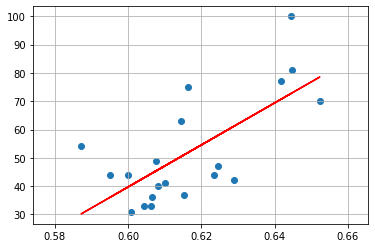

In [53]:
import matplotlib.pyplot as plt

axes = plt.axes()
axes.grid() 



from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(acc, point)
def predict(x):
   return slope * x + intercept
fitLine = predict(np.array(acc))
plt.scatter(acc,point) 
plt.plot(acc, fitLine, c='r')


#In the football world, we always say that we have to win the Duel to win the game. 
Here we see that there is a link between winning duels and winning games. However, this link is so weak that it's complicated to make a linear regression

# What are the time slots of the match with more goals?

In [54]:
import json
import pandas as pd
with open('events_England.json') as json_data:
    data_dict2 = json.load(json_data,encoding = "ISO-8859-1")    

dfevents = pd.DataFrame.from_dict(data_dict2, orient='columns')


In [55]:
# we define the dataframe dfShot that select only shot and free kick
len(dfevents.loc[dfevents['subEventId'] == 100 ].tags)
dfShot = dfevents.loc[(dfevents['eventName'] == 'Shot') | (dfevents['eventName'] == 'Free Kick') ]



In [56]:
# for each shot and free kick, we see if it leads to a goal
liste = []
for row in dfShot.tags:
    if len(row)>0:
        a = row[0]
        for values in a.values():
            if int(values) == 101 :
                liste.append('Goal')
            else:
                liste.append('Not Goal')
    else :
        liste.append('Not Goal')
     

In [57]:
# we concat dfShot and dfGoals
dfgoal = pd.DataFrame(liste,columns = ["goal"])
dfgoal =pd.concat([dfShot.reset_index(), dfgoal], axis = 1)
dfgoal = dfgoal.sort_values(by=['matchPeriod', 'eventSec'] , ascending=True)

In [58]:
# for each shot/freekick in dfGoal, we convert the moment of the action in minute, we see in which interval it belongs to, and we put the result in a new list
listeInter = []

for index, row in dfgoal.loc[(dfgoal['matchPeriod'] == '1H')].iterrows() : 
    x = (float(row['eventSec'])/60)
    if x>0 and x<9:
        listeInter.append('0-9')
    elif x>9 and x<18:
        listeInter.append('09-18')
    elif x>18 and x<27:
        listeInter.append('18-27')    
    elif x>27 and x<36:
        listeInter.append('27-36')
    elif x>36 and x<45:
        listeInter.append('36-45') 
    elif x > 45: 
        listeInter.append('45+')
for index, row in dfgoal.loc[(dfgoal['matchPeriod'] == '2H')].iterrows() : 
    x = (float(row['eventSec'])/60)+45
    if x>45 and x<54:
        listeInter.append('45-54')
    elif x>54 and x<63:
        listeInter.append('54-63')
    elif x>63 and x<72:
        listeInter.append('63-72')    
    elif x>72 and x<81:
        listeInter.append('72-81')
    elif x>81 and x<90:
        listeInter.append('81-90') 
    elif x > 90: 
        listeInter.append('90+')        
        
        




In [59]:
# as usual, we convert and concatenate
dfinter = pd.DataFrame(listeInter, columns=['inter'])
dfgoal = dfgoal.reset_index()
dfgoal = pd.concat([dfgoal, dfinter], axis = 1)


In [60]:
tab = pd.crosstab(dfgoal['inter'],dfgoal['goal'])
tab

goal,Goal,Not Goal
inter,,
0-9,70,4109
09-18,75,4099
18-27,85,4062
27-36,72,3956
36-45,87,4160
45+,24,1012
45-54,104,4088
54-63,101,4089
63-72,101,4020


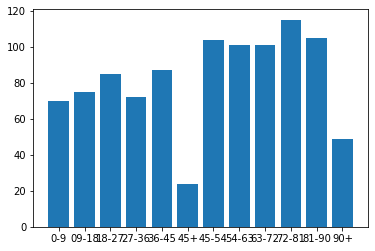

In [61]:
#we plot for each interval the number of goals
import numpy as np
import matplotlib.pyplot as plt
x=[]
y=[]
for index, row in tab.iterrows(): 
    x.append(index)
    y.append(row[0])

y_pos = np.arange(len(x))
plt.bar(y_pos, y)

# Create names on the x-axis
plt.xticks(y_pos, x)

plt.show()



In [62]:
# for this question, we need the informations of teams, so we merge 'team' and 'dfgoal', and we only keep the events that lead to a goal
dfenglishteam = dfenglishteam.rename(columns={'currentTeamId': 'teamId'})
dfgoal = pd.merge(dfgoal,dfenglishteam, on = 'teamId' )
dfgoal = dfgoal.loc[dfgoal['goal']== 'Goal']

In [63]:
# Then we group the number of 'inter' by name
tab2 = pd.crosstab(dfgoal['name'],dfgoal['inter'])
pd.DataFrame(tab2.sort_values(by = '81-90', ascending = False).head(10)['81-90'])

,81-90
name,
Manchester City,13
Arsenal,11
Manchester United,9
Chelsea,9
Liverpool,7
Watford,7
Crystal Palace,7
West Ham United,6
Tottenham Hotspur,5


In [64]:
# We group the number of inter group by player
tab2 = pd.crosstab(dfgoal['playerId'],dfgoal['inter'])
tab2 = tab2.reset_index()




In [65]:
# we write a fonction that will, for each player, count in how many intervals he has scored
listejoueur = []
for index, row in tab2.iterrows():
    nbr = 0
    for k in range(1, len(tab2.columns)):
        if row[tab2.columns[k]]> 0:
            nbr = nbr+1
    if nbr >= 8:
        listejoueur.append(row.playerId)
        
            
    

In [66]:
## Then we plot the names of those players
dfjoueur = pd.DataFrame(listejoueur, columns = ['wyId'])
dfresponse = pd.merge(dfplayers, dfjoueur, on = 'wyId')


In [67]:
dfresponse.shortName

0              R. Lukaku
1                H. Kane
2            R. Sterling
3          Gabriel Jesus
4               J. Vardy
5        Roberto Firmino
6          Mohamed Salah
7     \u00c1lvaro Morata
8     M. Arnautovi\u0107
9           A. Lacazette
10               W. Zaha
11             R. Mahrez
Name: shortName, dtype: object